In [1]:
import numpy as np
import pandas as pd
import collections
import time

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from pathlib import Path

#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk("input"):
    print(dirname)

input
input\evaluation
input\training


In [2]:
#data_path = Path('/kaggle/input/abstraction-and-reasoning-challenge/')
data_path = Path('input/')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'
training_tasks = sorted(os.listdir(training_path))
eval_tasks = sorted(os.listdir(evaluation_path))

In [3]:
#已解決的ID
solved_id=set()
solved_eva_id=set()

In [4]:
T = training_tasks
Trains = []
for i in range(400):
    task_file = str(training_path / T[i])
    task = json.load(open(task_file, 'r'))
    Trains.append(task)
    
E = eval_tasks
Evals= []
for i in range(400):
    task_file = str(evaluation_path / E[i])
    task = json.load(open(task_file, 'r'))
    Evals.append(task)

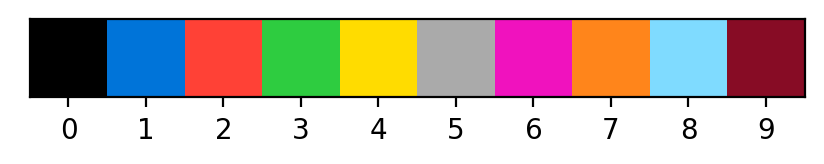

In [5]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()

In [6]:

def plot_picture(x):
    plt.imshow(np.array(x), cmap = cmap, norm = norm)
    plt.show()

In [7]:
def Defensive_Copy(A): 
    if type(A)!=list:
        A=A.tolist()
    n = len(A)
    k = len(A[0])
    L = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            L[i,j] = 0 + A[i][j]
    return L.tolist()

In [8]:
def Create(task, task_id = 0):
    n = len(task['train'])
    Input = [Defensive_Copy(task['train'][i]['input']) for i in range(n)]
    Output = [Defensive_Copy(task['train'][i]['output']) for i in range(n)]
    Input.append(Defensive_Copy(task['test'][task_id]['input']))
    return Input, Output

In [9]:
#A0 > B0
def issubarray(A0,B0):
    A=np.array(A0)
    B=np.array(B0)
    a1=A.shape[0]
    a2=A.shape[1]
    b1=B.shape[0]
    b2=B.shape[1]
    if (a1==b1 and a2==b2) or b1>a1 or b2>a2 or(b1==1 and b2==1):
        return False
    c1=a1-b1+1
    c2=a2-b2+1
    for i in range(c1):
        for j in range(c2):
            if (A[i:i+b1,j:j+b2]==B).all():
                return True
    return False

In [10]:
def issubarray_match(basic_task):
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    res=True
    for i in range(len(Input)):
        A=Input[i]
        B=Output[i]
        if issubarray(A,B)==False:
            res=False
            break
    return res

13


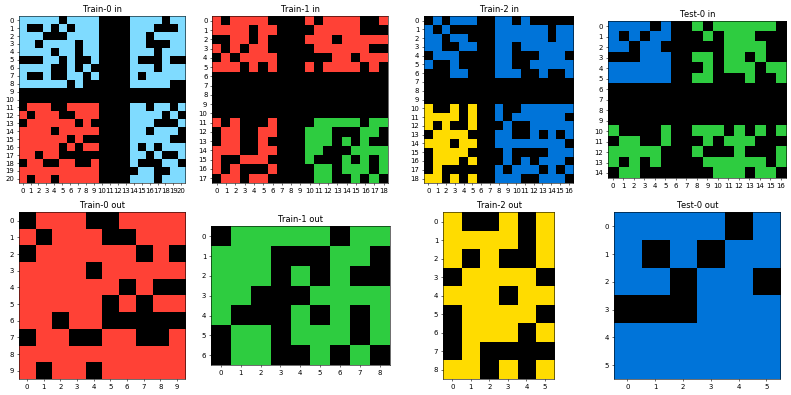

20


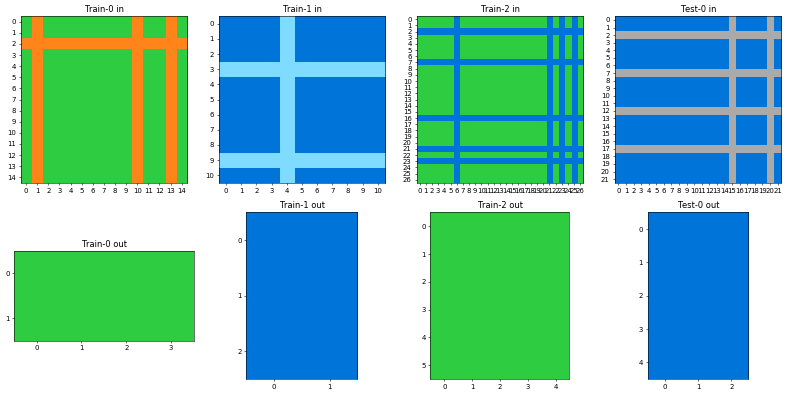

28


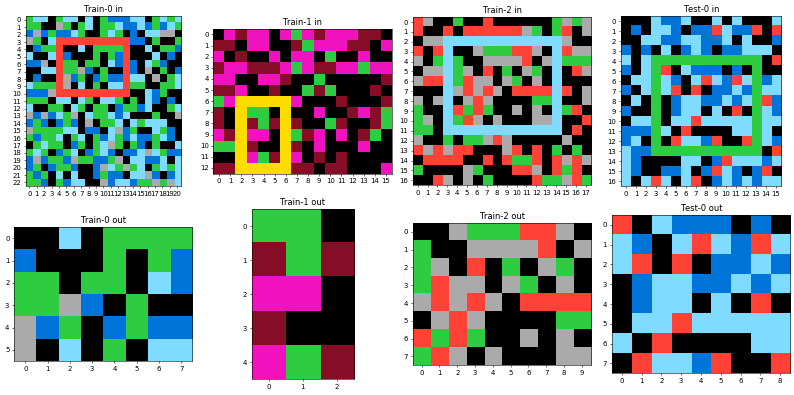

30


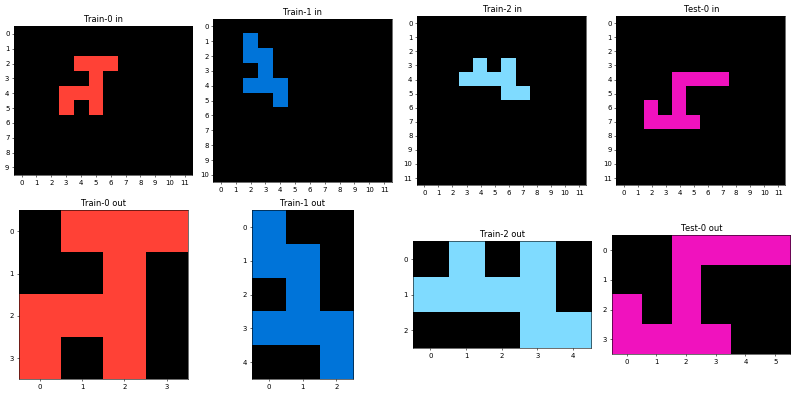

35


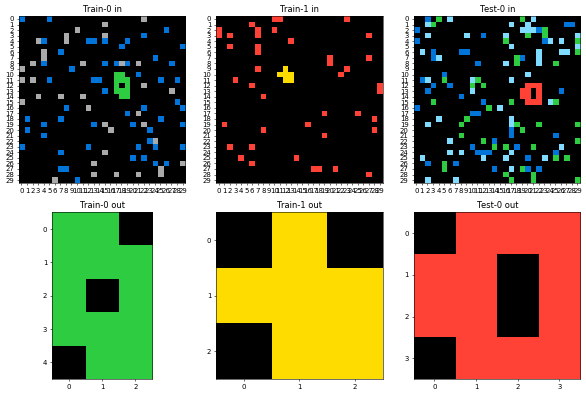

38


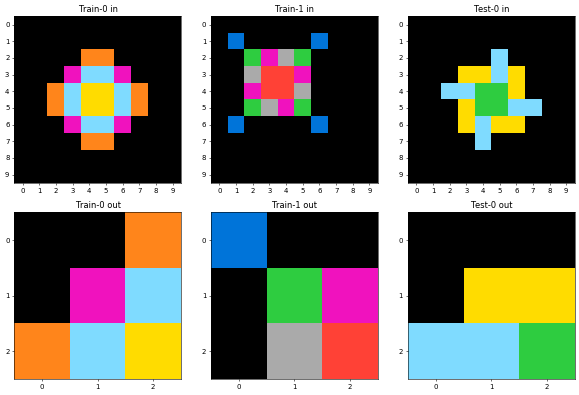

48


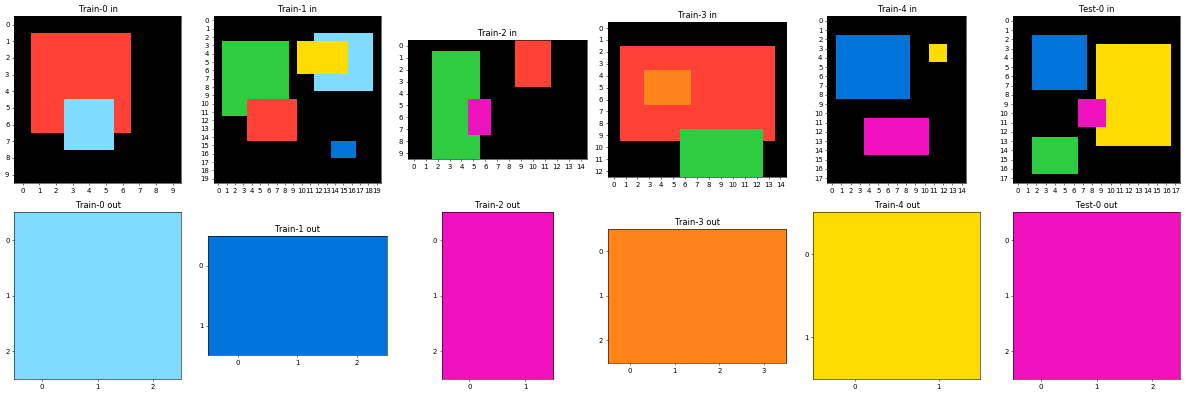

64


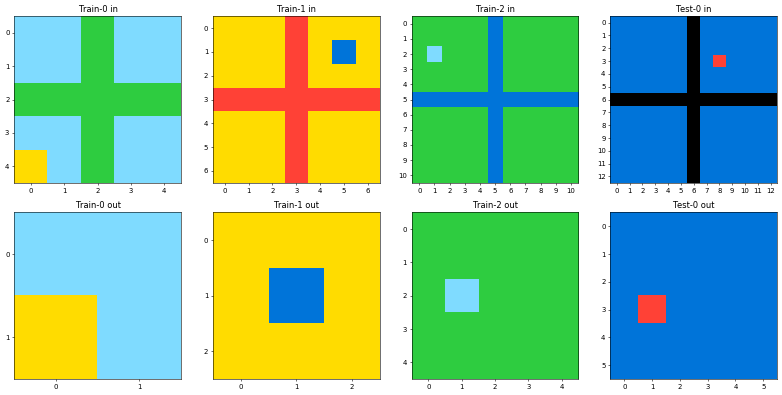

66


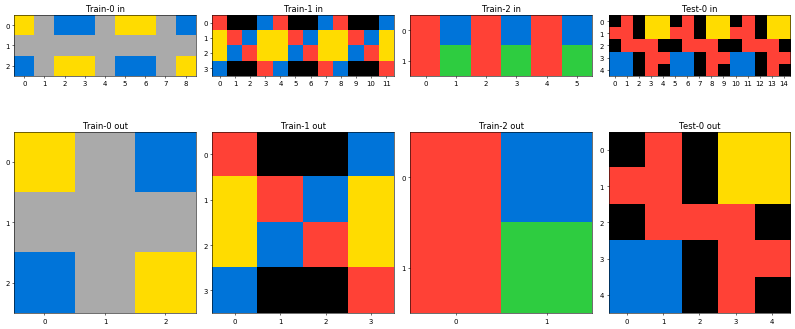

78


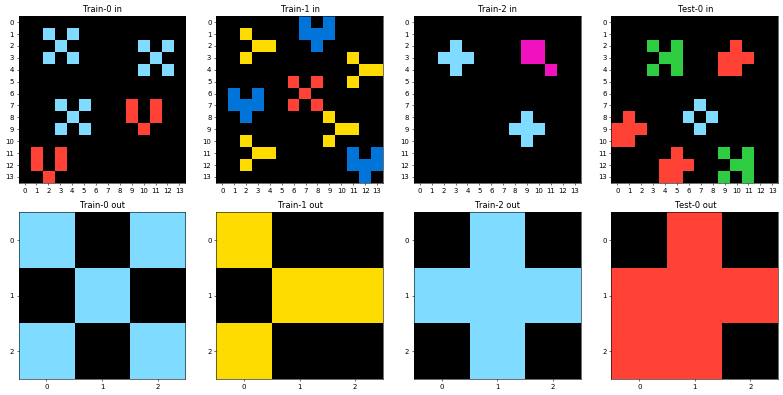

90


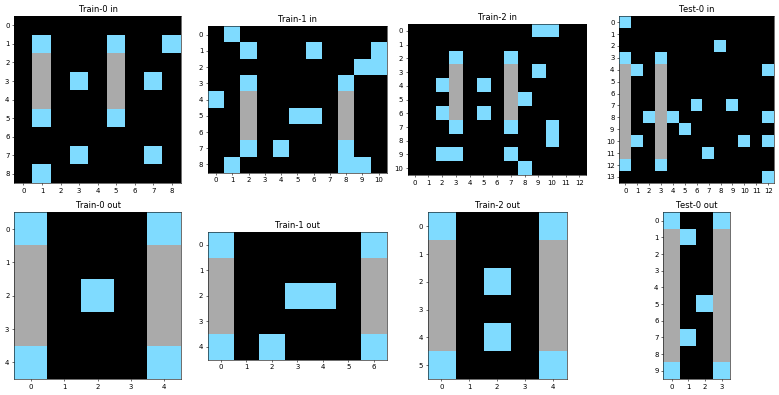

110


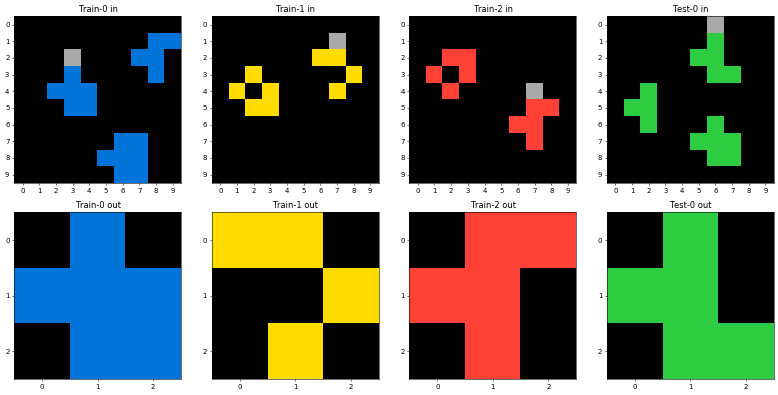

134


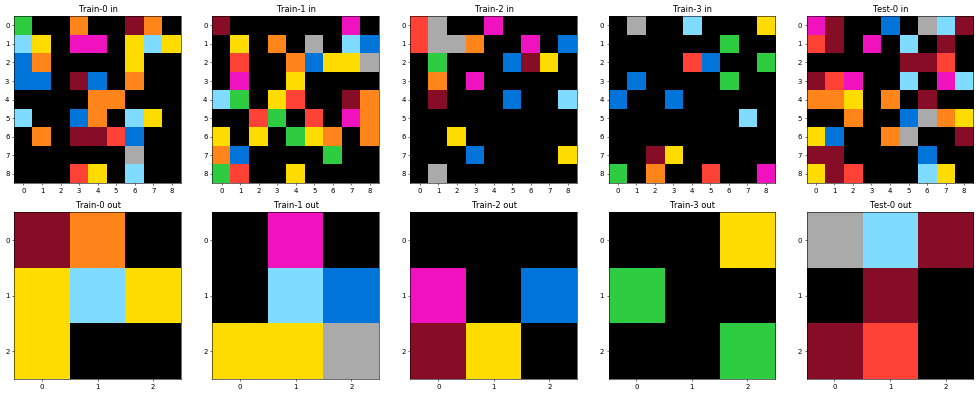

145


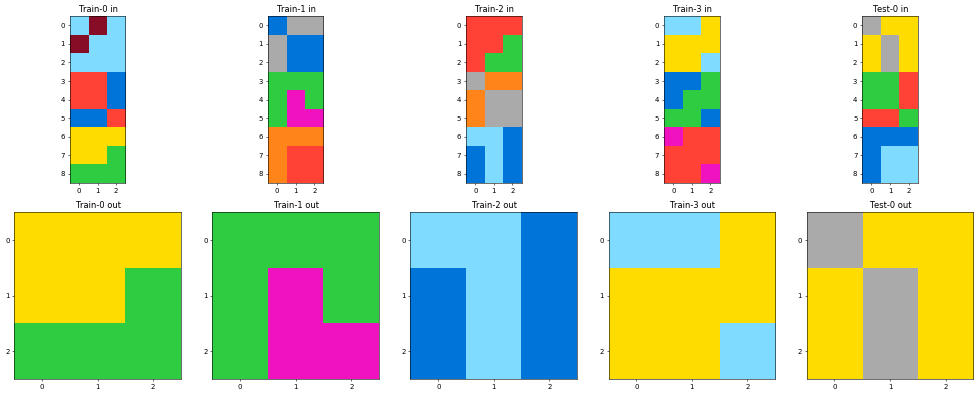

173


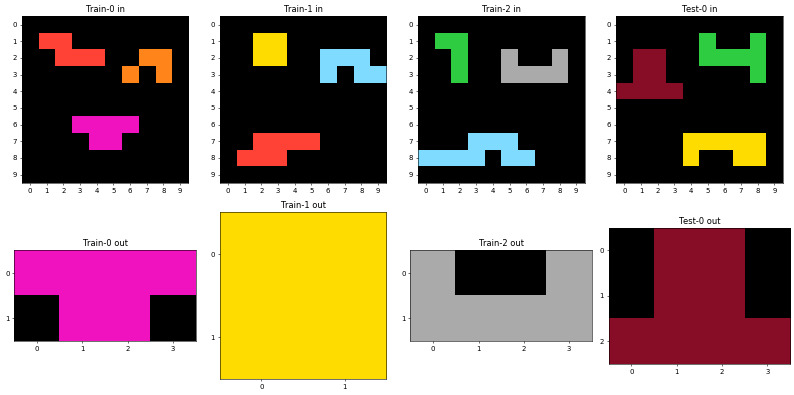

187


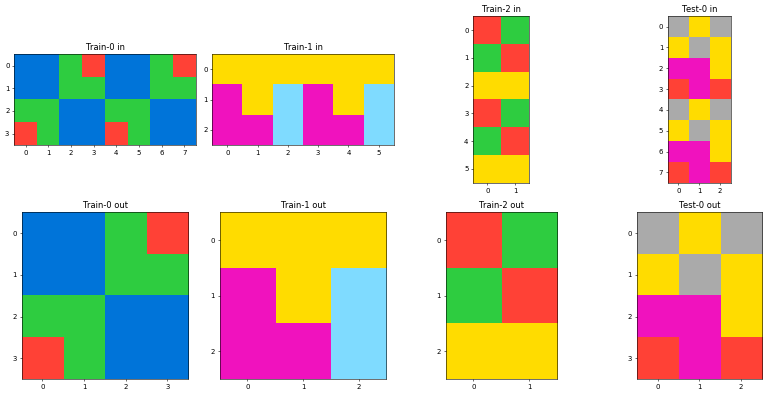

206


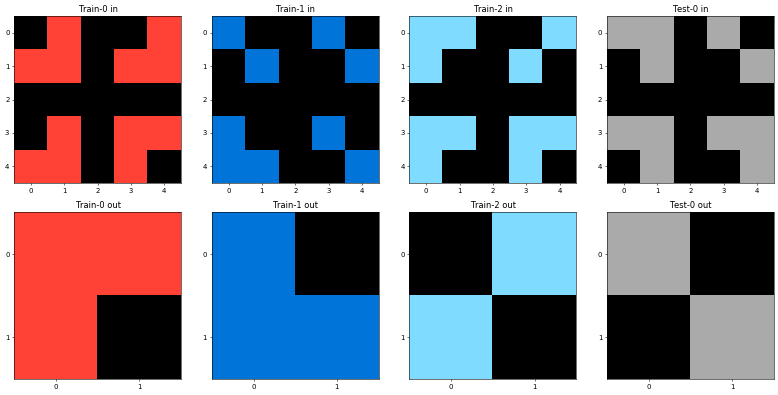

215


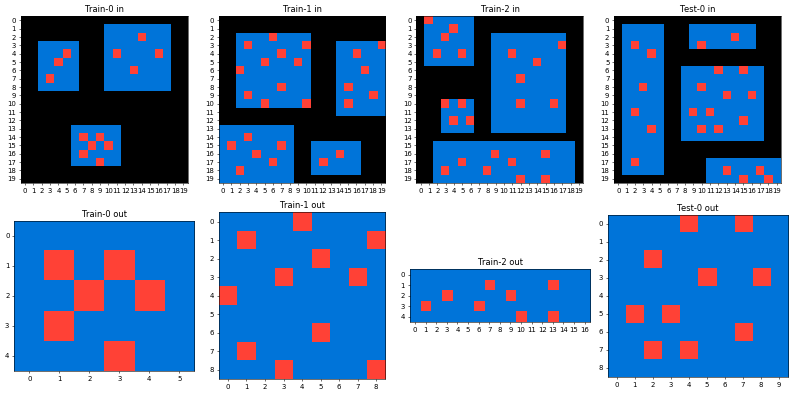

262


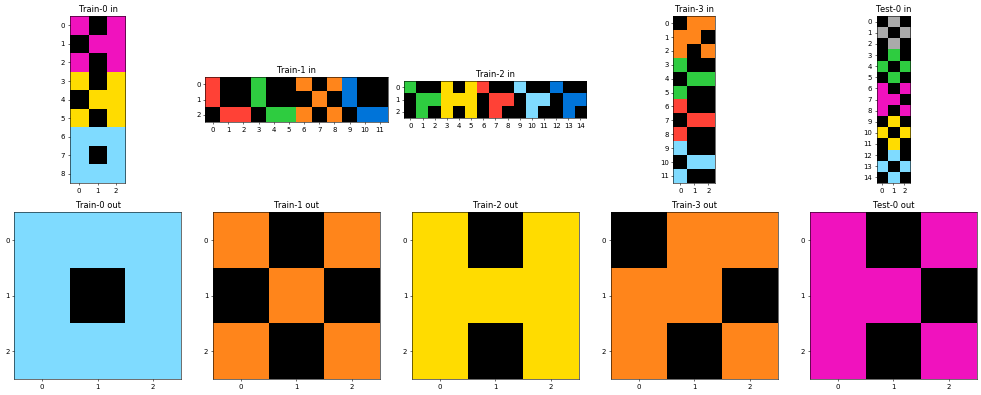

270


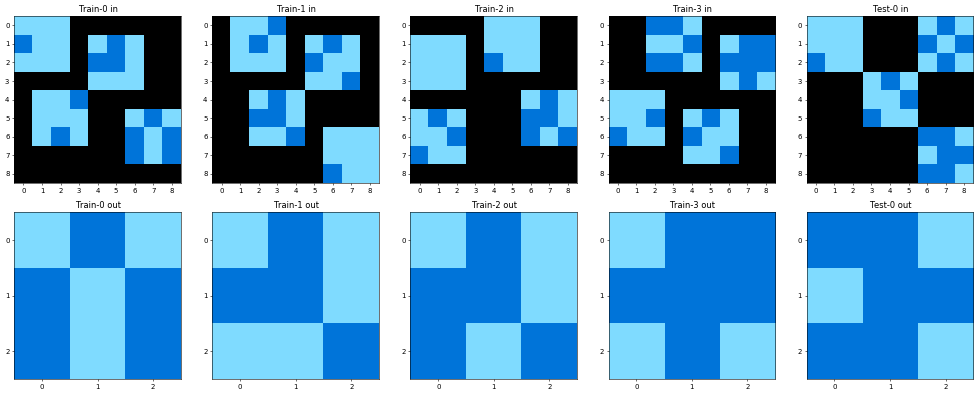

299


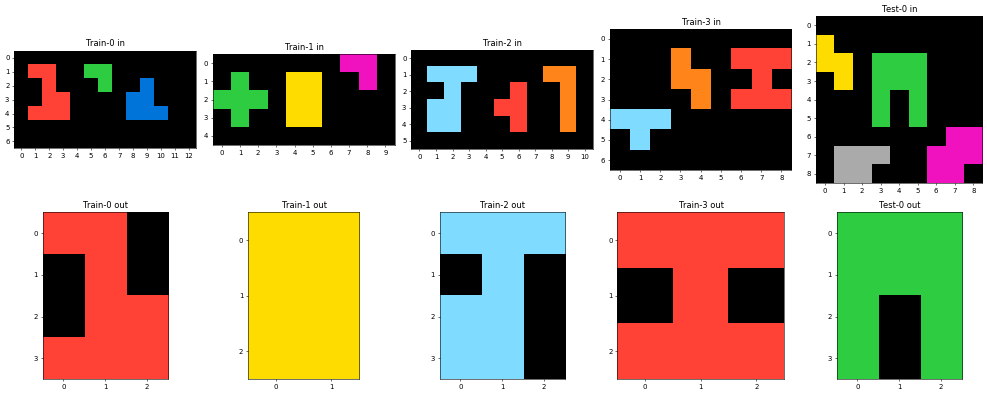

309


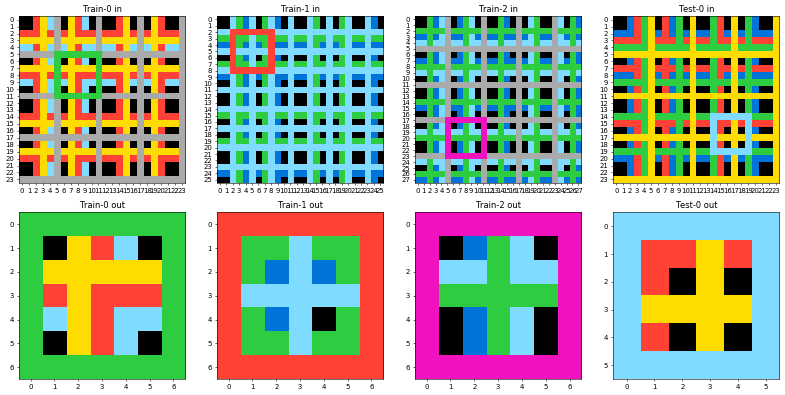

318


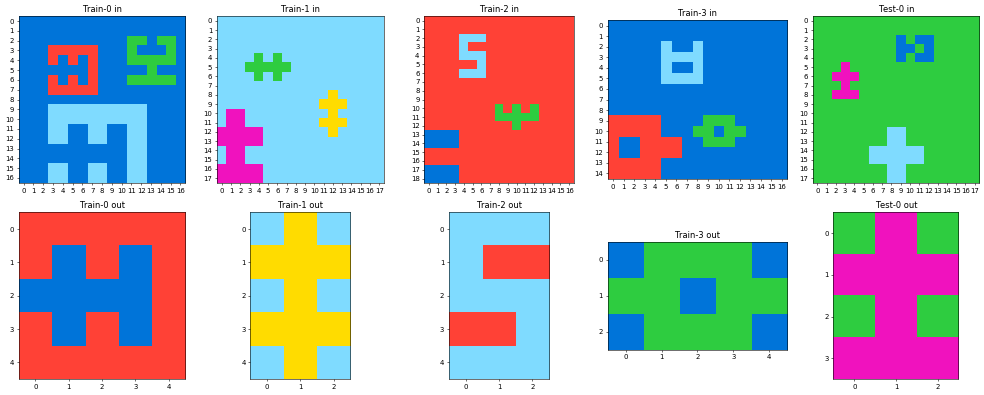

325


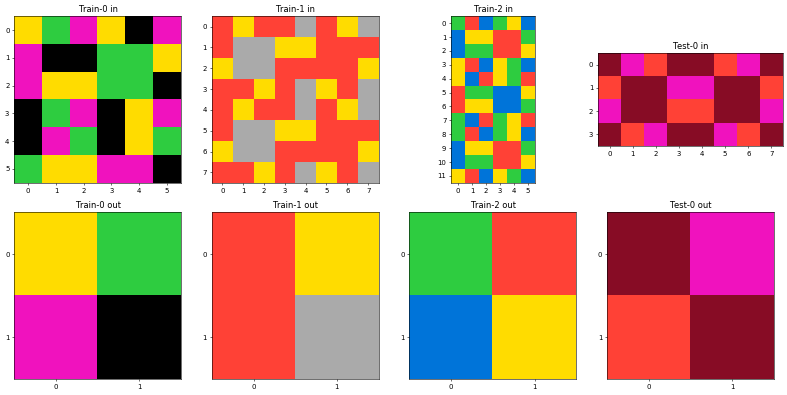

364


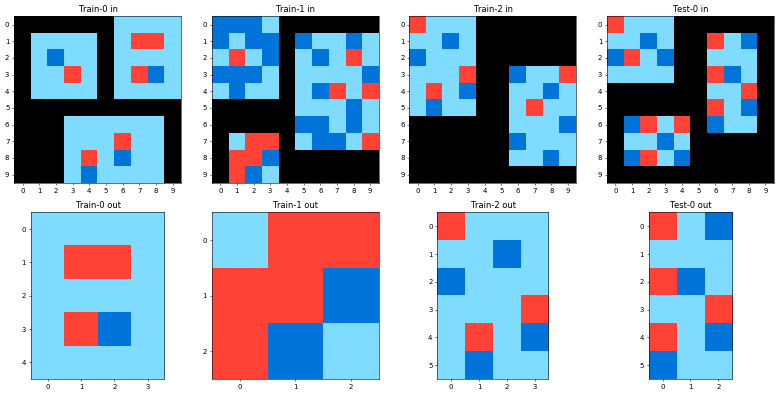

In [11]:
for i in range(400):
    task = Trains[i]
    
    k = len(task['test'])
    for j in range(k):
        
        basic_task = Create(task, j)
        sub_match=issubarray_match(basic_task)        
        if sub_match == True:
            print(i)
            plot_task(task)
            

In [12]:
BACKGROUND=0
def _get_bound(img0):
    img=np.array(img0)
    h, w = img.shape
    x0 = w - 1
    x1 = 0
    y0 = h - 1
    y1 = 0
    for x in range(w):
        for y in range(h):
            if img[y, x] == BACKGROUND:
                continue
            x0 = min(x0, x)
            x1 = max(x1, x)
            y0 = min(y0, y)
            y1 = max(y1, y)
    return x0, x1, y0, y1
def get_bound_image(img0):
    x0,x1,y0,y1=_get_bound(img0)
    img=np.array(img0)
    return img[y0:y1+1,x0:x1+1].tolist()

In [13]:

_neighbor_offsets = {
    4: [(1, 0), (-1, 0), (0, 1), (0, -1)],
    8: [(1, 0), (-1, 0), (0, 1), (0, -1), (-1, -1), (-1, 1), (1, -1), (1, 1)]
}
def _expand_region_indices(img, i, j, neighbor=4):
    h, w = img.shape
    seed_color = img[i, j]
    idx = np.zeros_like(img, dtype=np.bool)
    region = []
    region.append((i, j))
    while len(region) > 0:
        ii, jj = region.pop()
        if img[ii, jj] != seed_color:
            continue
        idx[ii, jj] = True
        for di, dj in _neighbor_offsets[neighbor]:
            ni, nj = ii + di, jj + dj
            if ni >= 0 and ni < h and nj >= 0 and nj < w \
                    and not idx[ni, nj]:
                region.append((ni, nj))
    return idx

In [14]:
def _expand_region_indices01(img, i, j, neighbor=4):
    h, w = img.shape
    seed_color = 1
    idx = np.zeros_like(img, dtype=np.bool)
    region = []
    region.append((i, j))
    while len(region) > 0:
        ii, jj = region.pop()
        if img[ii, jj] == 0:
            continue
        idx[ii, jj] = True
        for di, dj in _neighbor_offsets[neighbor]:
            ni, nj = ii + di, jj + dj
            if ni >= 0 and ni < h and nj >= 0 and nj < w \
                    and not idx[ni, nj]:
                region.append((ni, nj))
    return idx

In [15]:
def _split_conn(img0, neighbor=4):
    regions = []
    img=np.array(img0)
    mem = np.zeros_like(img, dtype=np.bool)
    h, w = img.shape
    for j in range(w):
        for i in range(h):
            p = img[i, j]
            if p == BACKGROUND or mem[i, j]:
                continue
            conn_idx = _expand_region_indices(img, i, j, neighbor)
            mem[conn_idx] = True
            regions.append((np.where(conn_idx, img, BACKGROUND)).tolist())
    return regions

def _split_conn01(img0, neighbor=4):
    regions = []
    img=np.array(img0)
    mem = np.zeros_like(img, dtype=np.bool)
    h, w = img.shape
    for j in range(w):
        for i in range(h):
            p = img[i, j]
            if p == BACKGROUND or mem[i, j]:
                continue
            conn_idx = _expand_region_indices01(img, i, j, neighbor)
            mem[conn_idx] = True
            regions.append((np.where(conn_idx, img, BACKGROUND)).tolist())
    return regions

In [16]:
def split_conn(img): 
    ''' Split an image into a list of images each containing a single connected region'''
    
    return _split_conn(img, 4)
def split_conn8(img):
    ''' Split an image into a list of images each containing a single connected region.
      Pixels of 8 neighbors are all considered "connected"
    '''
    
    return _split_conn(img, 8)

def split_conn01(img): 
    ''' Split an image into a list of images each containing a single connected region'''
    
    return _split_conn01(img, 4)
def split_conn801(img):
    ''' Split an image into a list of images each containing a single connected region.
      Pixels of 8 neighbors are all considered "connected"
    '''
    
    return _split_conn01(img, 8)

In [17]:


def _split_object(img0, neighbor=4):
    regions = []
    img=np.array(img0)
    mem = np.zeros_like(img, dtype=np.bool)
    h, w = img.shape
    for j in range(w):
        for i in range(h):
            p = img[i, j]
            if p == BACKGROUND or mem[i, j]:
                continue
            conn_idx = _expand_region_indices(img, i, j, neighbor)
            mem[conn_idx] = True
            splitimage=np.where(conn_idx, img, BACKGROUND)
#             minx=0
#             miny=0
#             maxx=0
#             maxy=0
#             for m in range(h):
#                 if sum(splitimage[m,:])!=0:
#                     miny=m
#                     break
#             for n in range(w):
#                 if sum(splitimage[:,n])!=0:
#                     minx=n
#                     break
#             for m in range(h-1,-1,-1):
#                 if sum(splitimage[m,:])!=0:
#                     maxy=m
#                     break
#             for n in range(w-1,-1,-1):
#                 if sum(splitimage[:,n])!=0:
#                     maxx=n
#                     break
            (minx,maxx,miny,maxy)=_get_bound(splitimage)
            split_object=(splitimage[miny:maxy+1,minx:maxx+1]).tolist()
            
            
            regions.append({'start': (miny, minx), 'obj':split_object})
    return regions

def _split_object01(img0, neighbor=4):
    regions = []
    img=np.array(img0)
    mem = np.zeros_like(img, dtype=np.bool)
    h, w = img.shape
    for j in range(w):
        for i in range(h):
            p = img[i, j]
            if p == BACKGROUND or mem[i, j]:
                continue
            conn_idx = _expand_region_indices01(img, i, j, neighbor)
            mem[conn_idx] = True
            splitimage=np.where(conn_idx, img, BACKGROUND)
#             minx=0
#             miny=0
#             maxx=0
#             maxy=0
#             for m in range(h):
#                 if sum(splitimage[m,:])!=0:
#                     miny=m
#                     break
#             for n in range(w):
#                 if sum(splitimage[:,n])!=0:
#                     minx=n
#                     break
#             for m in range(h-1,-1,-1):
#                 if sum(splitimage[m,:])!=0:
#                     maxy=m 
#                     break
#             for n in range(w-1,-1,-1):
#                 if sum(splitimage[:,n])!=0:
#                     maxx=n
#                     break
        
            (minx,maxx,miny,maxy)=_get_bound(splitimage)
            split_object=(splitimage[miny:maxy+1,minx:maxx+1]).tolist()
            
            
            regions.append({'start': (miny, minx), 'obj':split_object})
    return regions

In [18]:
def split_color(img0): 
    
    img=np.array(img0)
    color = np.unique(img)
    return [np.where(img == c, c, 0) for c in color if c != BACKGROUND]

In [19]:
def split_object(img):
    return _split_object(img, neighbor=4)
def split_object8(img):
    return _split_object(img, neighbor=8)
def split_object01(img):
    return _split_object01(img, neighbor=4)
def split_object801(img):
    return _split_object01(img, neighbor=8)

In [20]:
def split_color(img0): 
    
    img=np.array(img0)
    color = np.unique(img)
    return [np.where(img == c, c, 0) for c in color if c != BACKGROUND]
def split_color_crop(img0): 
    color_image=[]
    img=np.array(img0)
    color = np.unique(img)
    for c in color:
        if c!=BACKGROUND:
            imgc=np.where(img == c, c, 0)
            x0, x1, y0, y1=_get_bound(imgc)
            imgc=(imgc[y0:y1+1,x0:x1+1]).tolist()
            color_image.append(imgc)
    
    
    return color_image

In [21]:
a=Trains[364]["train"][0]["input"]

In [22]:
o1=split_object801(a)
np.array(o1[0]["obj"])

array([[8, 8, 8, 8],
       [8, 1, 8, 8],
       [8, 8, 2, 8],
       [8, 8, 8, 8]])

In [23]:
a1=np.array(o1[0]["obj"])
np.bincount(a1.flatten(),minlength=10)

array([ 0,  1,  1,  0,  0,  0,  0,  0, 14,  0], dtype=int64)

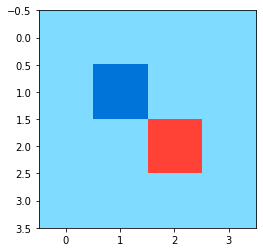

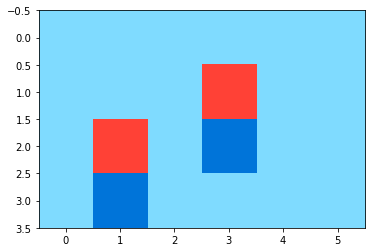

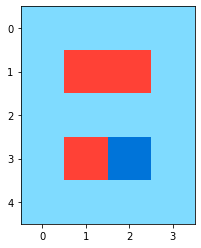

In [24]:
for i in range(len(o1)):
    plot_picture(o1[i]["obj"])

In [25]:
def sub_mode0_match(basic_task):
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    res=True
    for i in range(len(Input)):
        A=Input[i]
        B=Output[i]
        if len(split_object801(A))==1 or len(split_object801(B))!=1:
            res=False
    return res
        

35


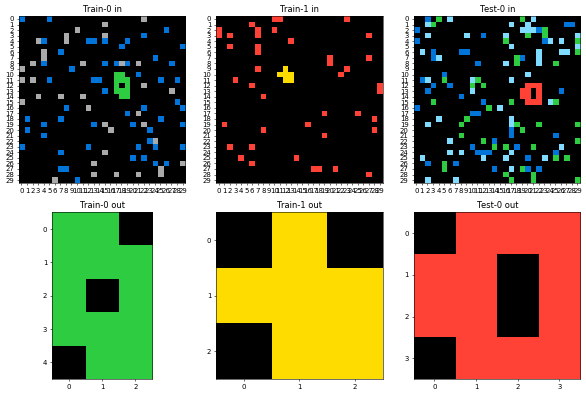

78


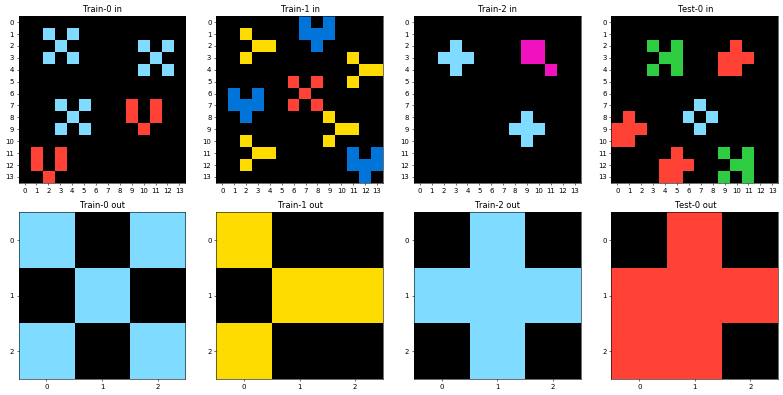

110


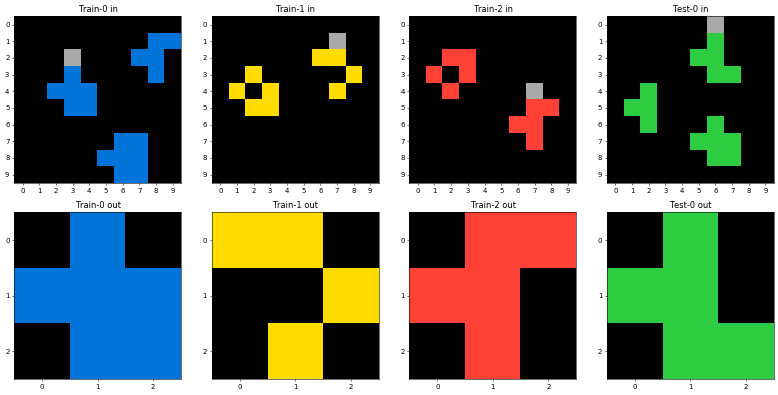

173


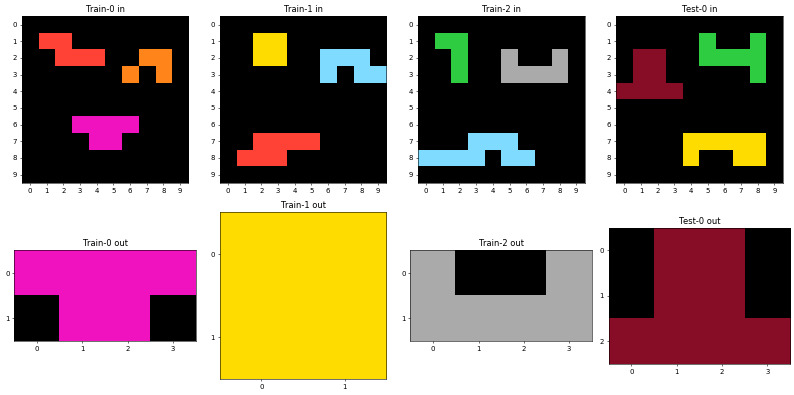

206


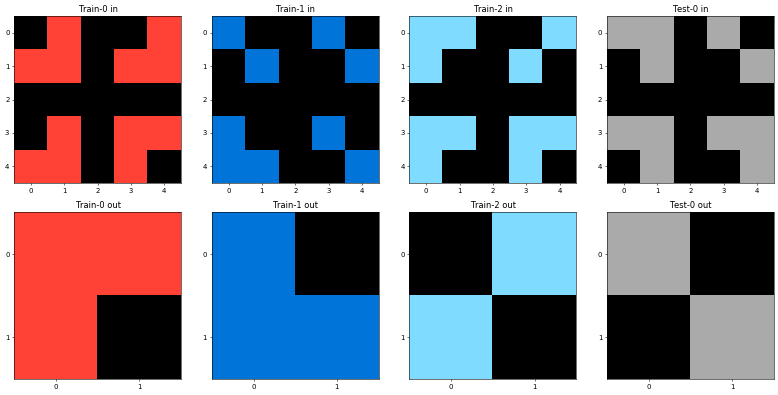

215


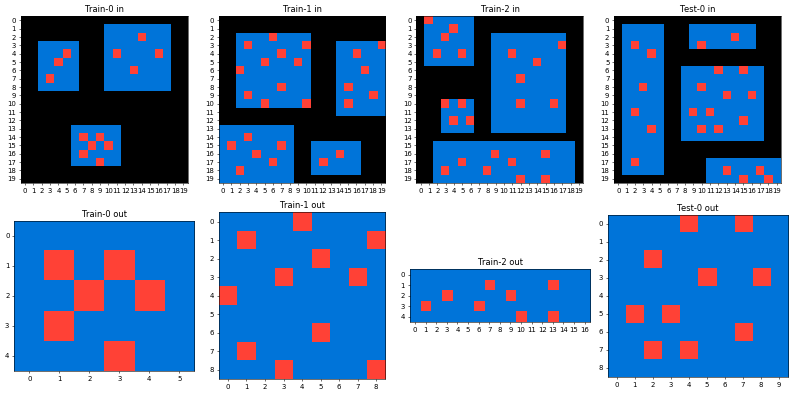

270


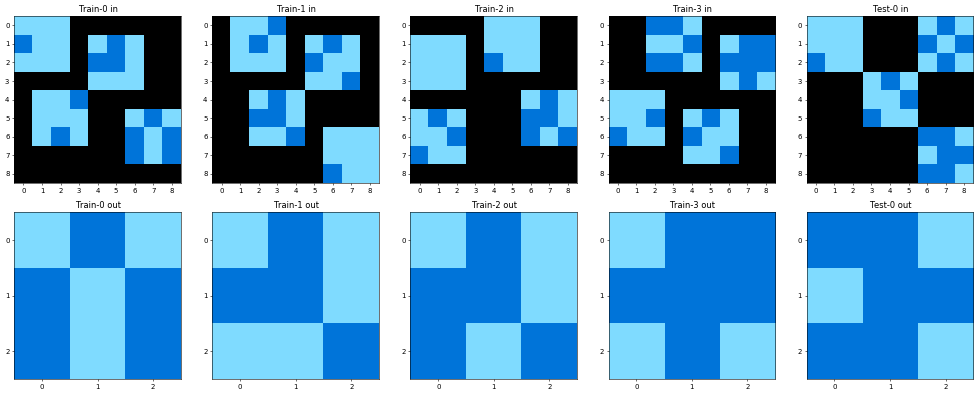

299


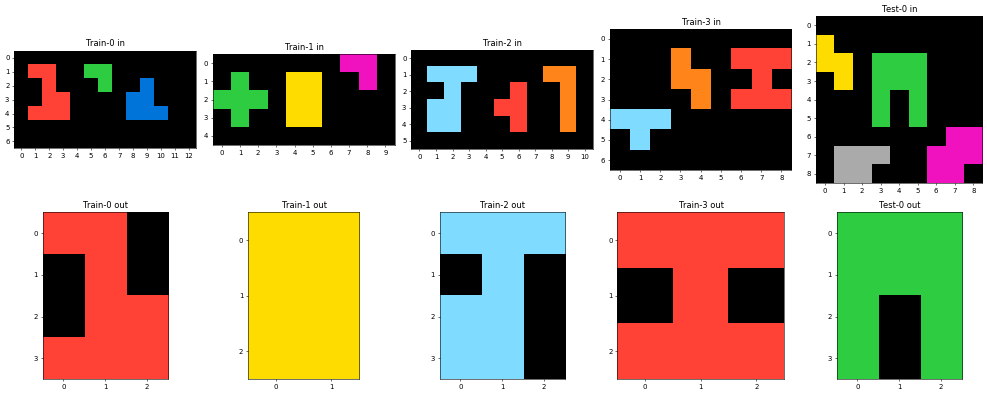

364


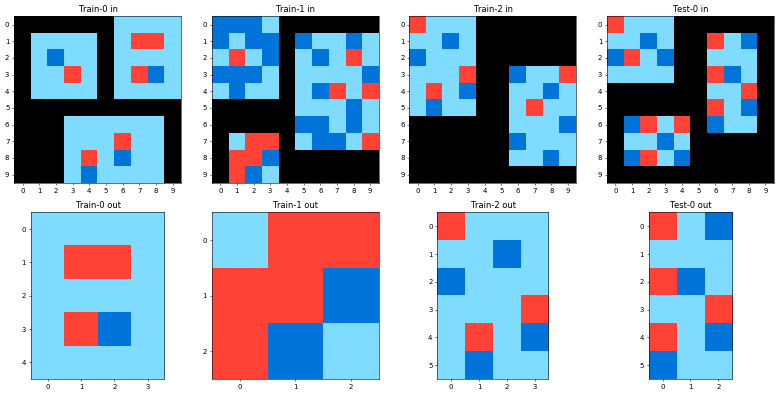

In [26]:
for i in range(400):
    task = Trains[i]
    
    k = len(task['test'])
    for j in range(k):
        
        basic_task = Create(task, j)
        sub_match=issubarray_match(basic_task)
        mode0=sub_mode0_match(basic_task)
        if sub_match == True and mode0==True:
            print(i)
            plot_task(task)

In [27]:
a=Trains[206]["train"][0]["input"]
d=split_object801(a)
d

[{'start': (0, 0), 'obj': [[0, 2], [2, 2]]},
 {'start': (3, 0), 'obj': [[0, 2], [2, 2]]},
 {'start': (0, 3), 'obj': [[0, 2], [2, 2]]},
 {'start': (3, 3), 'obj': [[2, 2], [2, 0]]}]

In [28]:
def object_dict(d):
    name_dic={}
    obj_dic={}
    for i in range(len(d)):
        d_obj=d[i]["obj"]
        if str(d_obj) not in name_dic:
            name_dic[str(d_obj)]=d_obj
            obj_dic[str(d_obj)]=1
        else:
            obj_dic[str(d_obj)]+=1
    
    return obj_dic,name_dic


def object_01area_dict(d):
    name_dic={}
    obj_dic={}
    for i in range(len(d)):
        d_obj=d[i]["obj"]
        if str(d_obj) not in name_dic:
            name_dic[str(d_obj)]=d_obj
            
            obj_dic[str(d_obj)]=np.sum(np.where(np.array(d_obj),1,0))    
    return obj_dic,name_dic


color=[0,1,2,3,4,5,6,7,8,9]

def object_color_dict(d,c):
    name_dic={}
    obj_dic={}
    mask=False
    for i in range(len(d)):
        d_obj=d[i]["obj"]
        
        if c in np.array(d_obj) and mask==False:
            
            mask=True
        
        if str(d_obj) not in name_dic:
            name_dic[str(d_obj)]=d_obj
            
            obj_dic[str(d_obj)]=np.sum(np.where(np.array(d_obj)==c,1,0))
    
    if mask==True:
        return obj_dic,name_dic
    else:
        return False



In [29]:
object_dict(d)

({'[[0, 2], [2, 2]]': 3, '[[2, 2], [2, 0]]': 1},
 {'[[0, 2], [2, 2]]': [[0, 2], [2, 2]], '[[2, 2], [2, 0]]': [[2, 2], [2, 0]]})

In [30]:
# def info_object(d):
#     for i in range(len(d)):
#         d_obj=d[i]["obj"]
        
        

In [31]:
stats=object_dict(d)[0]
stats['[[0, 2], [2, 2]]']

3

In [32]:
def max_mode(A1):
    stats,name_dic=object_dict(A1)    
    max_key = max(stats, key=lambda k: stats[k])
    return max_key,name_dic
def min_mode(A1):
    stats,name_dic=object_dict(A1)    
    min_key = min(stats, key=lambda k: stats[k])
    return min_key,name_dic
#object_01area_dict
def max_01_area(A1):
    stats,name_dic=object_01area_dict(A1)
    max_key = max(stats, key=lambda k: stats[k])
    return max_key,name_dic
def min_01_area(A1):
    stats,name_dic=object_01area_dict(A1)
    min_key = min(stats, key=lambda k: stats[k])
    return min_key,name_dic

mode_select=[max_mode,min_mode,max_01_area,min_01_area]


def max_color_mode(A1,c):
    if object_color_dict(A1,c):
        stats,name_dic=object_color_dict(A1,c)
        max_key = max(stats, key=lambda k: stats[k])
        return max_key,name_dic
    else:
        return False
    
def min_color_mode(A1,c):
    if object_color_dict(A1,c):
        stats,name_dic=object_color_dict(A1,c)
        min_key = min(stats, key=lambda k: stats[k])
        return min_key,name_dic
    else:
        return False
    


In [33]:
a=Trains[215]["train"][0]["input"]
d=split_object801(a)
max_color_mode(d,2)
object_color_dict(d,2)

({'[[1, 1, 1, 1, 1], [1, 1, 1, 2, 1], [1, 1, 2, 1, 1], [1, 1, 1, 1, 1], [1, 2, 1, 1, 1], [1, 1, 1, 1, 1]]': 3,
  '[[1, 1, 1, 1, 1, 1], [1, 2, 1, 2, 1, 1], [1, 1, 2, 1, 2, 1], [1, 2, 1, 1, 1, 1], [1, 1, 1, 2, 1, 1]]': 6,
  '[[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 2, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 2, 1, 1, 1, 1, 2, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 2, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1]]': 4},
 {'[[1, 1, 1, 1, 1], [1, 1, 1, 2, 1], [1, 1, 2, 1, 1], [1, 1, 1, 1, 1], [1, 2, 1, 1, 1], [1, 1, 1, 1, 1]]': [[1,
    1,
    1,
    1,
    1],
   [1, 1, 1, 2, 1],
   [1, 1, 2, 1, 1],
   [1, 1, 1, 1, 1],
   [1, 2, 1, 1, 1],
   [1, 1, 1, 1, 1]],
  '[[1, 1, 1, 1, 1, 1], [1, 2, 1, 2, 1, 1], [1, 1, 2, 1, 2, 1], [1, 2, 1, 1, 1, 1], [1, 1, 1, 2, 1, 1]]': [[1,
    1,
    1,
    1,
    1,
    1],
   [1, 2, 1, 2, 1, 1],
   [1, 1, 2, 1, 2, 1],
   [1, 2, 1, 1, 1, 1],
   [1, 1, 1, 2, 1, 1]],
  '[[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 2, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1

In [34]:
mode_select_from_dict=[max_mode,min_mode]

In [35]:
split_objects=[split_object,split_object01,split_object8,split_object801]

In [36]:
def object_mode_match(basic_task):
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    
    for m in range(len(split_objects)):
        for selectmode in mode_select:

            mode=True
            for i in range(len(Input)):
                A=Input[i]
                B=Output[i]
                A1=split_objects[m](A)
                
                mode_image,name_dic=selectmode(A1)

                proposal_sol=name_dic[mode_image]
                #print(proposal_sol,B)
                if proposal_sol!=B:
                    mode=False
            if mode==True:
                return split_objects[m],selectmode
    #print(mode)
    return mode
def solve_object_mode(basic_task):
    if object_mode_match(basic_task):
        split_object_mode,themode=object_mode_match(basic_task)
        #print(split_object_mode,themode)
    else:
        return False
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    
    A1=split_object_mode(Test_Case)
    mode_image,name_dic=themode(A1)
    
    return name_dic[mode_image]



In [37]:
def object_mode_color_match(basic_task):
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    
    for m in range(len(split_objects)):
        for c in range(0,10):
            for maxmin in [max_color_mode,min_color_mode]:
                mode=True
                for i in range(len(Input)):
                    A=Input[i]
                    B=Output[i]
                    A1=split_objects[m](A)
                    if max_color_mode(A1,c):
                        mode_image,name_dic=maxmin(A1,c)
                        #print(max_color_mode(A1,2))
                    else:
                        mode=False

                        break


                    proposal_sol=name_dic[mode_image]
                    #print(proposal_sol,B)
                    if proposal_sol!=B:
                        mode=False
                if mode==True:
                    return split_objects[m],c,maxmin
    #print(mode)
#     return mode
def solve_object_mode_color(basic_task):
    if object_mode_color_match(basic_task):
        split_object_mode,c,maxmin_mode=object_mode_color_match(basic_task)
    else:
        return False
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    
    A1=split_object_mode(Test_Case)
    mode_image,name_dic=maxmin_mode(A1,c)
    
    return name_dic[mode_image]
    

        
        
        
        

78 0


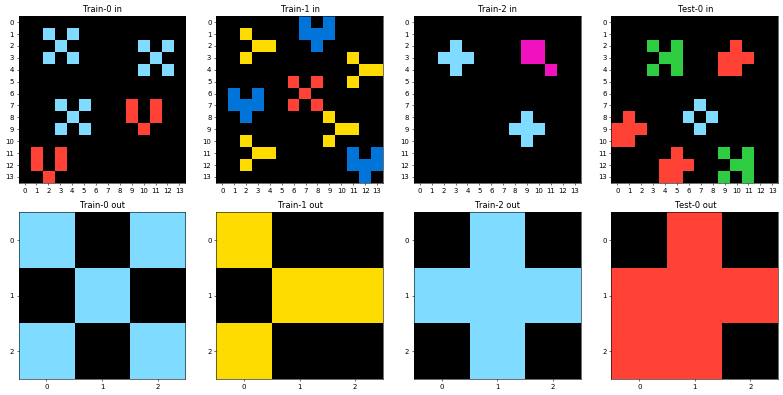

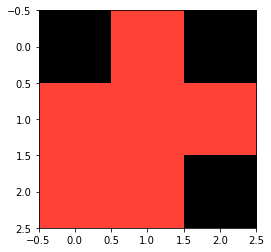

206 0


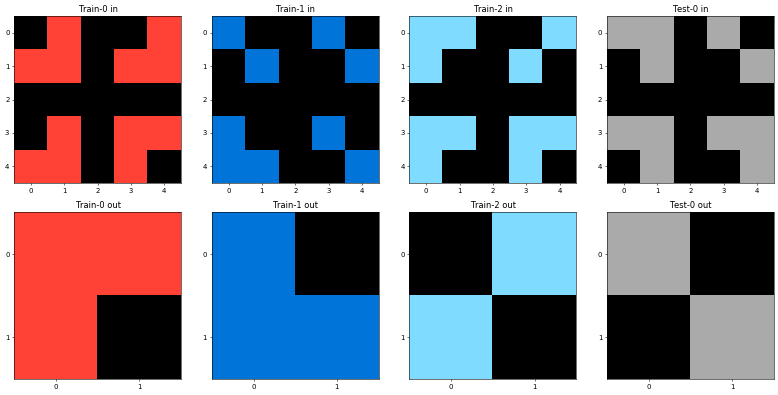

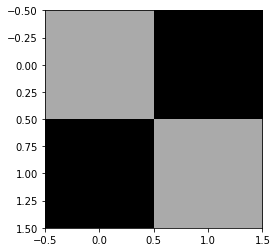

299 0


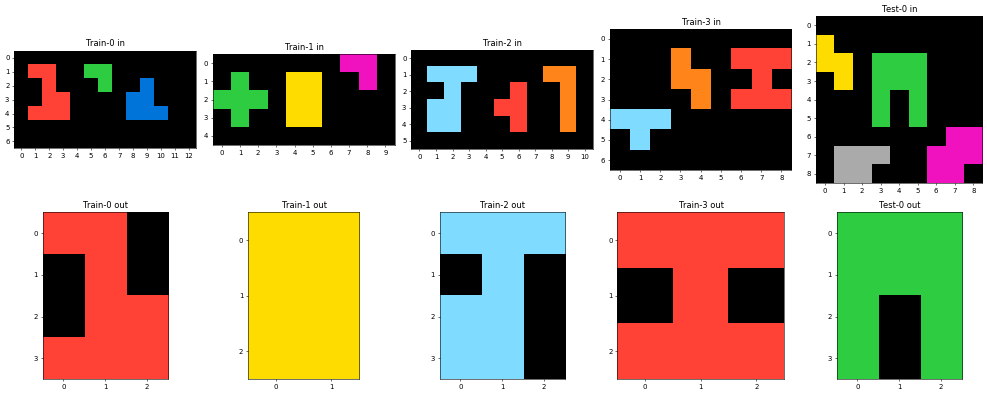

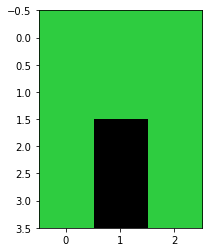

In [38]:
for i in range(400):
    task = Trains[i]
    
    k = len(task['test'])
    for j in range(k):
        
        basic_task = Create(task, j)
        sub_match=issubarray_match(basic_task)
        mode0=sub_mode0_match(basic_task)
        if sub_match == True and mode0==True :
            a=solve_object_mode(basic_task)
            if  a!=False and a==task['test'][j]['output'] :
                print(i,j)
                plot_task(task)
                plot_picture(a)
                solved_id.add(i)

312 0


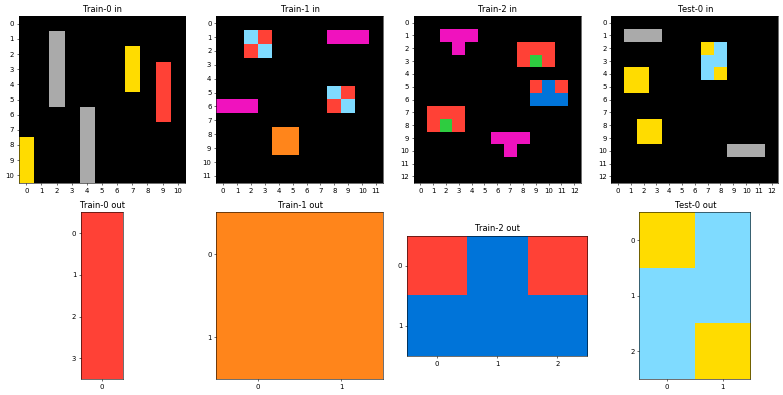

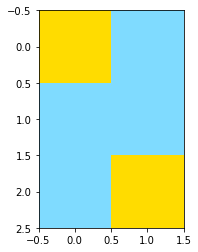

385 0


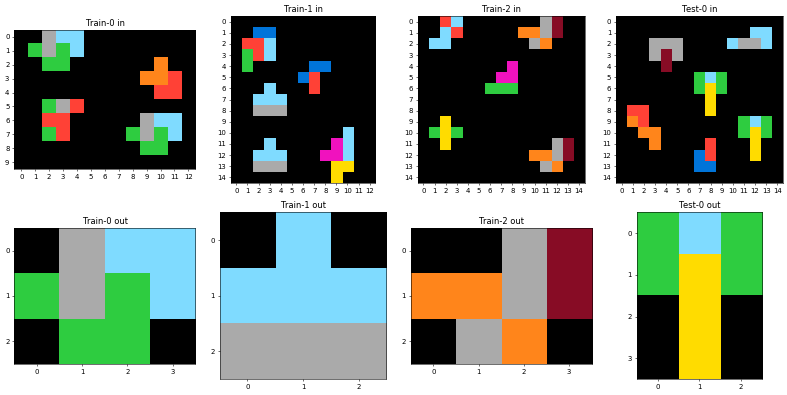

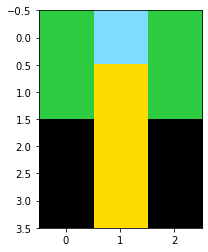

In [39]:
for i in range(400):
    task = Evals[i]
    
    k = len(task['test'])
    for j in range(k):
        
        basic_task = Create(task, j)
        sub_match=issubarray_match(basic_task)
        mode0=sub_mode0_match(basic_task)
        if sub_match == True and mode0==True :
            a=solve_object_mode(basic_task)
            if  a!=False and a==task['test'][j]['output'] :
                print(i,j)
                plot_task(task)
                plot_picture(a)
                solved_eva_id.add(i)

35 0


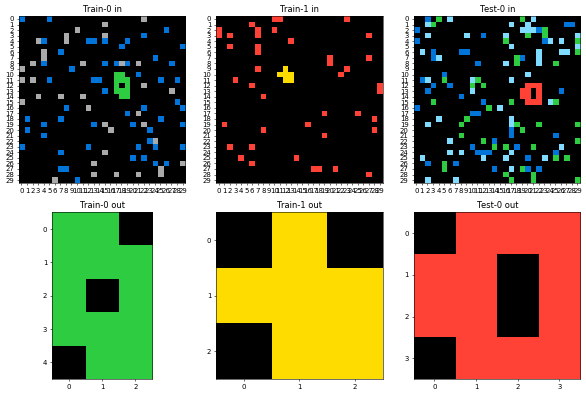

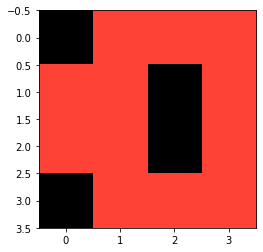

215 0


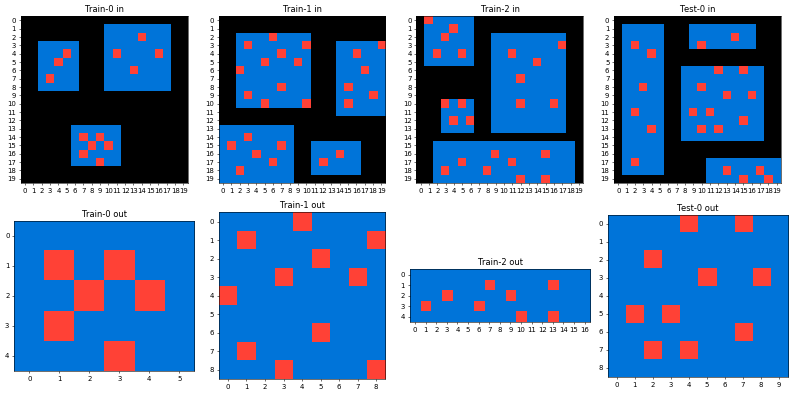

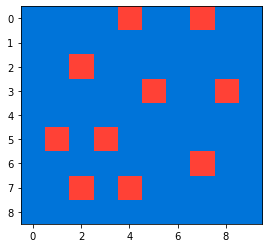

270 0


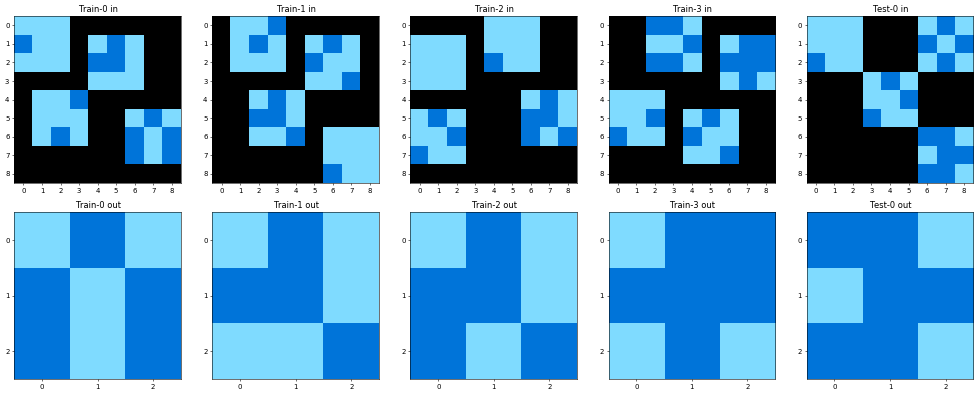

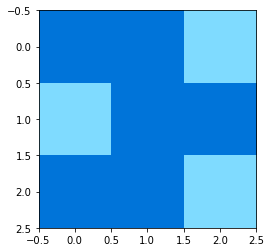

364 0


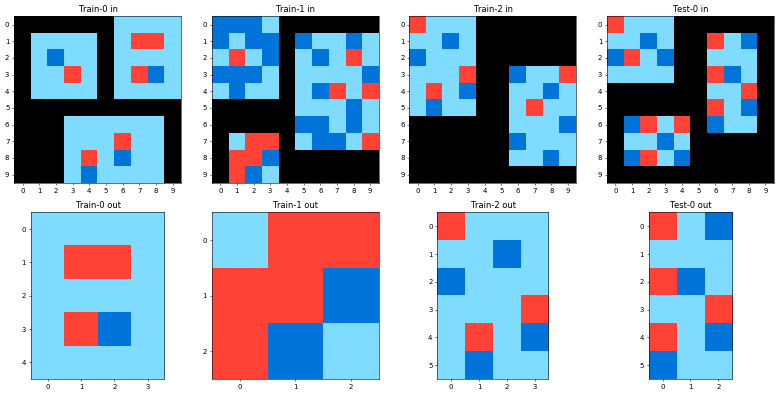

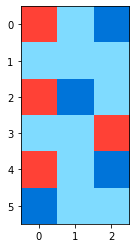

In [40]:
for i in range(400):
    task = Trains[i]
    
    k = len(task['test'])
    for j in range(k):
        
        basic_task = Create(task, j)
        sub_match=issubarray_match(basic_task)
        mode0=sub_mode0_match(basic_task)
        if sub_match == True and mode0==True :
            a=solve_object_mode_color(basic_task)
            if  a!=False and a==task['test'][j]['output']:
                print(i,j)
                plot_task(task)
                plot_picture(a)
                solved_id.add(i)

In [41]:
#優先級:比上個低
for i in range(400):
    task = Evals[i]
    
    k = len(task['test'])
    for j in range(k):
        
        basic_task = Create(task, j)
        sub_match=issubarray_match(basic_task)
        mode0=sub_mode0_match(basic_task)
        if sub_match == True and mode0==True :
            a=solve_object_mode_color(basic_task)
            if  a!=False and a==task['test'][j]['output']:
                print(i,j)
                plot_task(task)
                plot_picture(a)
                solved_eva_id.add(i)

In [42]:
#110 173(對稱)未解決

In [43]:
list(solved_id)

[35, 299, 364, 206, 78, 270, 215]

In [44]:
list(solved_eva_id)

[312, 385]